In [1]:
# IMPORTING TOOL AND READING DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('Mobiles Dataset (2025).csv' , encoding='latin1')

df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [5]:
df.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')

In [6]:
df2 = df[['Company Name' , 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera' , 'Back Camera',
          'Processor', 'Battery Capacity', 'Screen Size' , 'Launched Price (USA)', 'Launched Year']]

In [8]:
df2['Launched Price (USD)'] = df2['Launched Price (USD)'].astype(str) \
    .str.replace('USD ', '') \
    .str.replace(',', '') \
    .astype(float)

In [9]:
# Converting to integer
df2['Launched Price (USD)'] = pd.to_numeric(df2['Launched Price (USD)']).astype(int)

# Checking highest Price
df2.sort_values(by= 'Launched Price (USD)' , ascending =False)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USD),Launched Year
685,Nokia,T21,466g,4GB,8MP,8MP,Unisoc T612,8200mAh,10.4 inches,39622,2022
661,Huawei,Mate XT 512GB,245g,12GB,13MP,50MP + 12MP + 48MP,Kirin 9010,"5,000mAh",7.92 inches,2799,2024
630,Huawei,Mate X2,295g,8GB,16MP,50MP,Kirin 9000 5G,"4,500mAh",8.0 inches (unfolded),2699,2021
660,Huawei,Mate XT 256GB,245g,12GB,13MP,50MP + 12MP + 48MP,Kirin 9010,"5,000mAh",7.92 inches,2599,2024
634,Huawei,Mate Xs 2,255g,8GB,10.7MP,50MP,Snapdragon 888 4G,"4,600mAh",7.8 inches (unfolded),2499,2022
...,...,...,...,...,...,...,...,...,...,...,...
711,Tecno,Pop 9 4G 64GB,195g,3GB,5MP,8MP,Unisoc SC9863A,"5,000mAh",6.52 inches,99,2024
181,Samsung,Galaxy Tab E 8.0 16GB,360g,1.5GB,2MP,5MP,Qualcomm MSM8916,5000mAh,8 inches,99,2016
738,Tecno,Pop 8 64GB,195g,3GB,5MP,8MP,Unisoc SC9832E,"5,000mAh",6.52 inches,89,2024
716,Tecno,Pop 9 64GB,190g,3GB,5MP,8MP,Unisoc SC9832E,"5,000mAh",6.52 inches,89,2024


In [10]:
#Originally the value was in a float format, removing the last 2 digits
df2.at[685, 'Launched Price (USD)'] = int(str(df2.at[685, 'Launched Price (USD)'])[:-2])

#Previewing the changes
df2.iloc[685]

Company Name                  Nokia
Model Name                      T21
Mobile Weight                  466g
RAM                             4GB
Front Camera                    8MP
Back Camera                     8MP
Processor               Unisoc T612
Battery Capacity            8200mAh
Screen Size             10.4 inches
Launched Price (USD)            396
Launched Year                  2022
Name: 685, dtype: object

In [11]:
#Checking description of df2['Launched Price (USD)']
df2['Launched Price (USD)'].describe()

count     930.000000
mean      583.334409
std       421.008026
min        79.000000
25%       250.000000
50%       449.000000
75%       849.000000
max      2799.000000
Name: Launched Price (USD), dtype: float64

In [12]:
# Filtering rows to remain with rows where Price is between 1000 and 3000
df3 = df2[(df2['Launched Price (USD)'] >= 1000) & (df2['Launched Price (USD)'] <= 3000)].reset_index()
df3 = df3.drop(columns = 'index')

# Display result
df3

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USD),Launched Year
0,Apple,iPhone 16 Pro 256GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,1049,2024
1,Apple,iPhone 16 Pro 512GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,1099,2024
2,Apple,iPhone 16 Pro Max 128GB,221g,6GB,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,1099,2024
3,Apple,iPhone 16 Pro Max 256GB,221g,8GB,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,1199,2024
4,Apple,iPhone 16 Pro Max 512GB,221g,8GB,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,1299,2024
...,...,...,...,...,...,...,...,...,...,...,...
133,Honor,Magic7 Ultimate,234g,16GB,12MP,50MP,Qualcomm Snapdragon 8 Gen 3,"5,550mAh",6.81 inches,1499,2024
134,Honor,Magic V3,231g,12GB,16MP,50MP,Qualcomm Snapdragon 8 Gen 2,"5,000mAh",7.92 inches,1899,2024
135,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,1899,2024
136,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,1719,2024


In [13]:
filtered_df = df3[(df3['Launched Year'] >= 2021) & (df3['Launched Year'] <= 2025)].reset_index()
filtered_df = filtered_df.drop(columns = 'index')
           
filtered_df

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USD),Launched Year
0,Apple,iPhone 16 Pro 256GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,1049,2024
1,Apple,iPhone 16 Pro 512GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,1099,2024
2,Apple,iPhone 16 Pro Max 128GB,221g,6GB,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,1099,2024
3,Apple,iPhone 16 Pro Max 256GB,221g,8GB,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,1199,2024
4,Apple,iPhone 16 Pro Max 512GB,221g,8GB,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,1299,2024
...,...,...,...,...,...,...,...,...,...,...,...
103,Honor,Magic7 Ultimate,234g,16GB,12MP,50MP,Qualcomm Snapdragon 8 Gen 3,"5,550mAh",6.81 inches,1499,2024
104,Honor,Magic V3,231g,12GB,16MP,50MP,Qualcomm Snapdragon 8 Gen 2,"5,000mAh",7.92 inches,1899,2024
105,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,1899,2024
106,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,1719,2024


In [14]:
# Extracting numbers from the column, filtered_df['Model Name'] and save it as a float
filtered_df['Storage(GB)'] = filtered_df['Model Name'].str.extract(r'(\d+)(GB|TB)')[0].astype(float)

# Extracting numbers from the column, filtered_df['RAM'] and save it as a float
filtered_df['RAM (GB)'] = filtered_df['RAM'].str.extract('(\d+)').astype(int)
filtered_df = filtered_df.drop(columns = 'RAM')

filtered_df.sort_values(by = 'Storage(GB)' , ascending = True)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19464\2622686254.py:5: SyntaxWarning: invalid escape sequence '\d'
  filtered_df['RAM (GB)'] = filtered_df['RAM'].str.extract('(\d+)').astype(int)


,Company Name,Model Name,Mobile Weight,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USD),Launched Year,Storage(GB),RAM (GB)
107,Samsung,Galaxy Z Fold6 1TB,239g,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,2259,2024,1.0,12
2,Apple,iPhone 16 Pro Max 128GB,221g,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,1099,2024,128.0,6
13,Apple,iPhone 14 Pro 128GB,206g,12MP / 4K,48MP + 12MP,A16 Bionic,"4,200mAh",6.1 inches,1099,2022,128.0,6
6,Apple,iPhone 15 Pro 128GB,206g,12MP / 4K,48MP + 12MP,A16 Bionic,"4,400mAh",6.1 inches,1099,2023,128.0,6
24,Samsung,Galaxy S24 Ultra 128GB,234g,12MP,200MP + 12MP,Exynos 2400,5000mAh,6.8 inches,1199,2024,128.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...
100,Honor,Magic V2,231g,16MP,50MP,Qualcomm Snapdragon 8 Gen 2,"5,000mAh",7.92 inches,1899,2024,NaN,12
101,Honor,Magic7,203g,12MP,50MP,Qualcomm Snapdragon 8 Gen 3,"5,200mAh",6.81 inches,1099,2024,NaN,8
102,Honor,Magic7 Pro,219g,12MP,50MP,Qualcomm Snapdragon 8 Gen 3,"5,500mAh",6.81 inches,1299,2024,NaN,12
103,Honor,Magic7 Ultimate,234g,12MP,50MP,Qualcomm Snapdragon 8 Gen 3,"5,550mAh",6.81 inches,1499,2024,NaN,16


In [15]:
filtered_df['Storage(GB)'] = filtered_df['Storage(GB)'].apply(lambda x: 1024 if x == 1 else float(x))
filtered_df['Storage(GB)'] = filtered_df['Storage(GB)'].apply(lambda x: 2048 if x == 2 else float(x))

filtered_df[['Storage(GB)', 'RAM (GB)']].sort_values(by = 'Storage(GB)', ascending = False).head()

,Storage(GB),RAM (GB)
107,1024.0,12
4,512.0,8
11,512.0,8
8,512.0,8
1,512.0,8


In [16]:
filtered_df['Storage(GB)'].isna().sum()

np.int64(31)

In [17]:
filtered_df = filtered_df.dropna()

In [18]:
filtered_df['Storage(GB)'] = filtered_df['Storage(GB)'].astype(int)

filtered_df['Storage(GB)'].info()

<class 'pandas.core.series.Series'>
Index: 77 entries, 0 to 107
Series name: Storage(GB)
Non-Null Count  Dtype
--------------  -----
77 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [19]:
filtered_df['Storage(GB)'] = filtered_df['Storage(GB)'].astype(int)

filtered_df['Storage(GB)'].info()

<class 'pandas.core.series.Series'>
Index: 77 entries, 0 to 107
Series name: Storage(GB)
Non-Null Count  Dtype
--------------  -----
77 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


In [20]:
# Checking number of rows and columns
filtered_df.shape

(77, 12)

In [21]:
# CLASSIFYING DATA ACCORDING TO STORAGE AND PERFORMANCE (RAM).

In [22]:
# Classifying according to RAM

filtered_df.loc[filtered_df['RAM (GB)']<=4,'Performance']='Low End'
filtered_df.loc[(filtered_df['RAM (GB)']>=6) & (filtered_df['RAM (GB)']<=8),'Performance']='Mid End'
filtered_df.loc[filtered_df['RAM (GB)']>=12,'Performance']='High End'

# Classifying according to Storage

filtered_df.loc[(filtered_df['Storage(GB)']>=64) & (filtered_df['Storage(GB)']<=128),'Category']='Entry-Level Storage'
filtered_df.loc[(filtered_df['Storage(GB)']>=256) & (filtered_df['Storage(GB)']<=512),'Category']='Mid Range Storage'
filtered_df.loc[(filtered_df['Storage(GB)']>=1024),'Category']='High Range Storage'

filtered_df

,Company Name,Model Name,Mobile Weight,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USD),Launched Year,Storage(GB),RAM (GB),Performance,Category
0,Apple,iPhone 16 Pro 256GB,206g,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,1049,2024,256,8,Mid End,Mid Range Storage
1,Apple,iPhone 16 Pro 512GB,206g,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,1099,2024,512,8,Mid End,Mid Range Storage
2,Apple,iPhone 16 Pro Max 128GB,221g,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,1099,2024,128,6,Mid End,Entry-Level Storage
3,Apple,iPhone 16 Pro Max 256GB,221g,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,1199,2024,256,8,Mid End,Mid Range Storage
4,Apple,iPhone 16 Pro Max 512GB,221g,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,1299,2024,512,8,Mid End,Mid Range Storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Tecno,Camon 20s Pro 5G 512GB,202g,50MP,108MP,MediaTek Dimensity 9200,"5,200mAh",6.9 inches,1099,2024,512,12,High End,Mid Range Storage
88,Tecno,Camon 20 Premier 512GB,205g,50MP,108MP,MediaTek Dimensity 8200,"5,200mAh",6.8 inches,1049,2024,512,12,High End,Mid Range Storage
105,Samsung,Galaxy Z Fold6 256GB,239g,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,1899,2024,256,12,High End,Mid Range Storage
106,Samsung,Galaxy Z Fold6 512GB,239g,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,1719,2024,512,12,High End,Mid Range Storage


In [ ]:
VISULIZATIONS


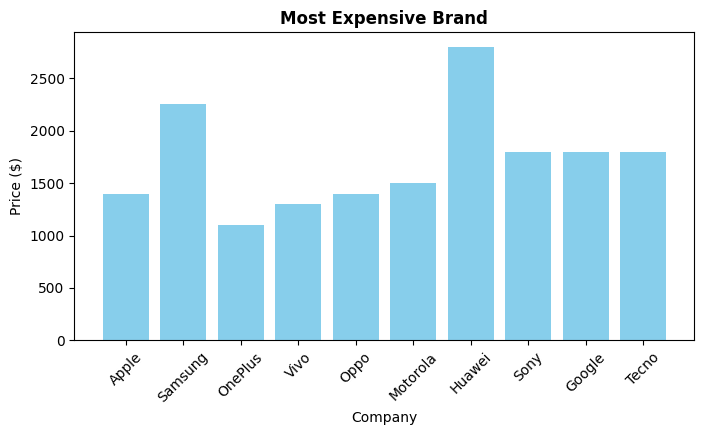

In [24]:
plt.figure(figsize=(8, 4))
plt.bar(filtered_df['Company Name'], filtered_df['Launched Price (USD)'], color='skyblue')

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Price ($)')
plt.title('Most Expensive Brand', fontweight="bold")
plt.xticks(rotation=45)

# Show the graph
plt.show()

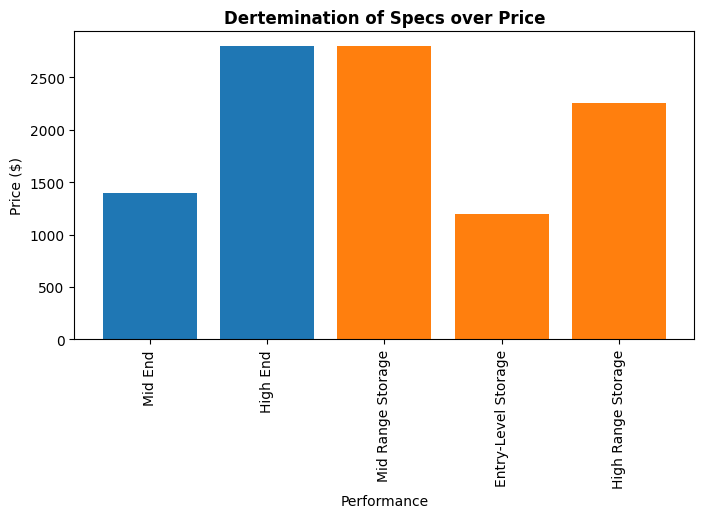

In [25]:
plt.figure(figsize=(8, 4))
plt.bar(filtered_df['Performance'], filtered_df['Launched Price (USD)'])
plt.bar(filtered_df['Category'], filtered_df['Launched Price (USD)'])
# Add labels and title
plt.xlabel('Performance')
plt.ylabel('Price ($)')
plt.title('Dertemination of Specs over Price', fontweight="bold")
plt.xticks()
plt.xticks(rotation=90)

# Show the graph
plt.show()

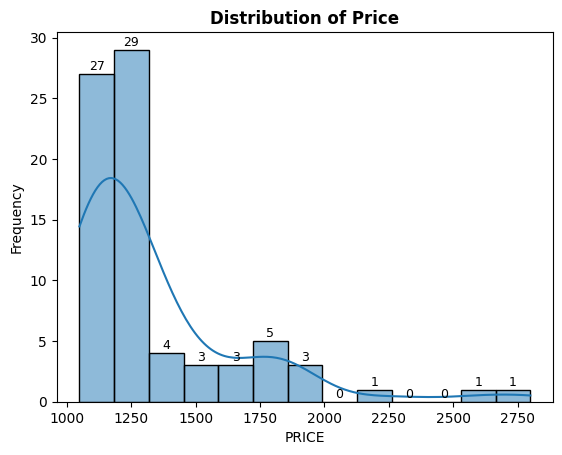

In [26]:
ax = sns.histplot(filtered_df['Launched Price (USD)'], kde=True)

# Adding values on top of the bars
for p in ax.patches:  # ax.patches gives access to each individual bar
    height = p.get_height()  # Get the height of the bar
    x = p.get_x() + p.get_width() / 2  # Get the x position (center of the bar)
    y = height + 0.1  # Positioning the text slightly above the bar
    ax.text(x, y, str(int(height)), ha='center', va='bottom', fontsize=9, color='black')  # Add the text

# Title and labels
plt.title('Distribution of Price', fontweight="bold")
plt.xlabel('PRICE')
plt.ylabel('Frequency')

# Show the plot
plt.show()

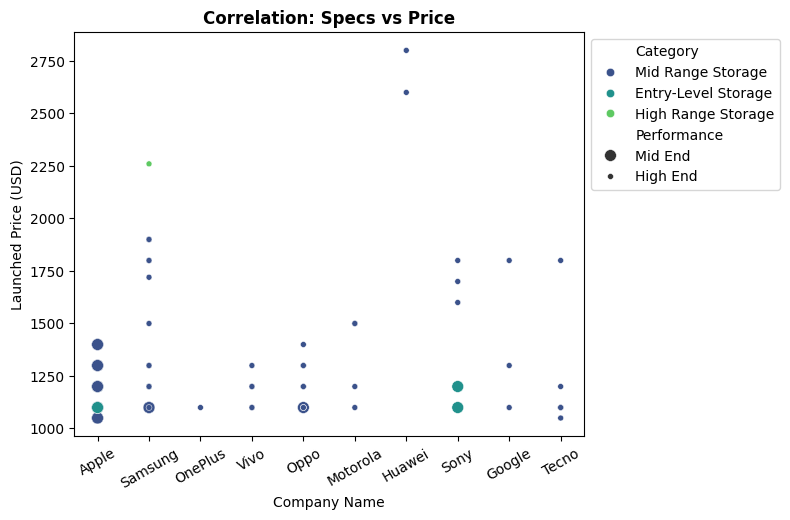

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(x = 'Company Name' , y = 'Launched Price (USD)', data= filtered_df, hue=filtered_df['Category'], palette="viridis", size="Performance")
plt.title('Correlation: Specs vs Price', fontweight="bold")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

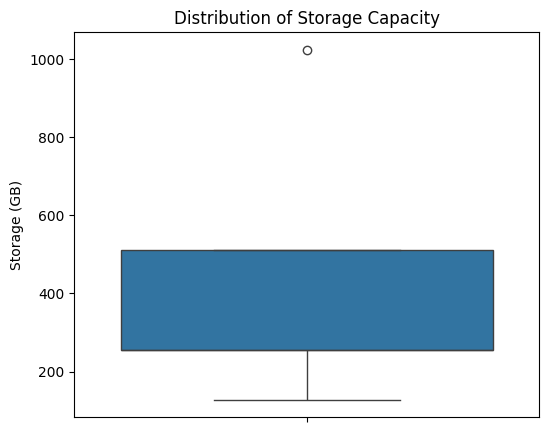

In [42]:
plt.figure(figsize=(6, 5))
sns.boxplot(y='Storage(GB)', data=filtered_df)
plt.title('Distribution of Storage Capacity')
plt.ylabel('Storage (GB)')
plt.show()


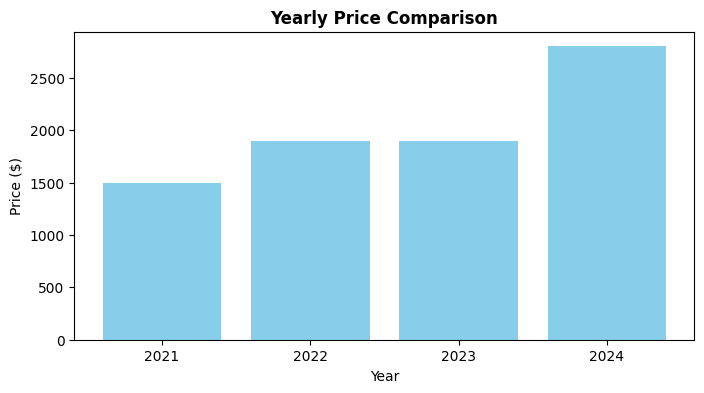

In [28]:
plt.figure(figsize=(8, 4))
plt.bar(filtered_df['Launched Year'], filtered_df['Launched Price (USD)'], color='skyblue')

# Add labels and title
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.title('Yearly Price Comparison', fontweight="bold")
plt.xticks(rotation=0)

# Show the graph
plt.show()

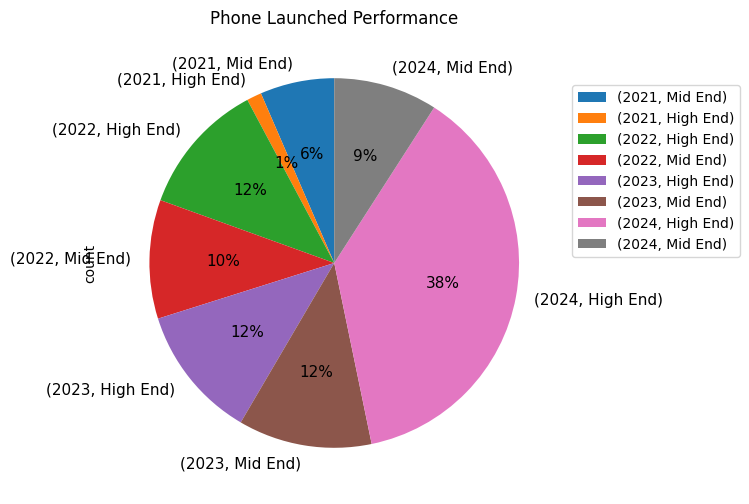

In [29]:
grouped_performance = filtered_df.groupby('Launched Year')['Performance'].value_counts()

grouped_performance.plot.pie(title='Phone Launched Performance',autopct='%1.0f%%', fontsize='11', startangle=90, figsize=(10,6))
plt.legend()
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

plt.show()


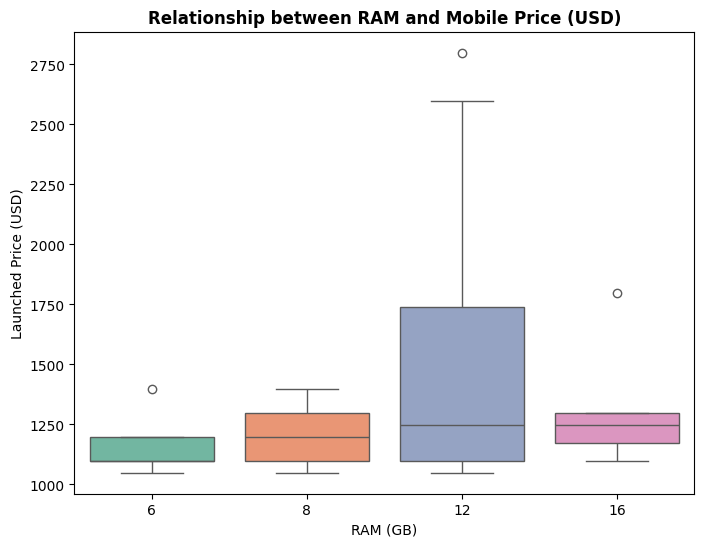

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='RAM (GB)', y='Launched Price (USD)', data=filtered_df, hue='RAM (GB)', palette='Set2', legend=False)
plt.title('Relationship between RAM and Mobile Price (USD)', fontsize=12, fontweight="bold")
plt.xlabel('RAM (GB)', fontsize=10)
plt.ylabel('Launched Price (USD)', fontsize=10)
plt.legend([], [], frameon=False)  # Hides the legend explicitly
plt.show()


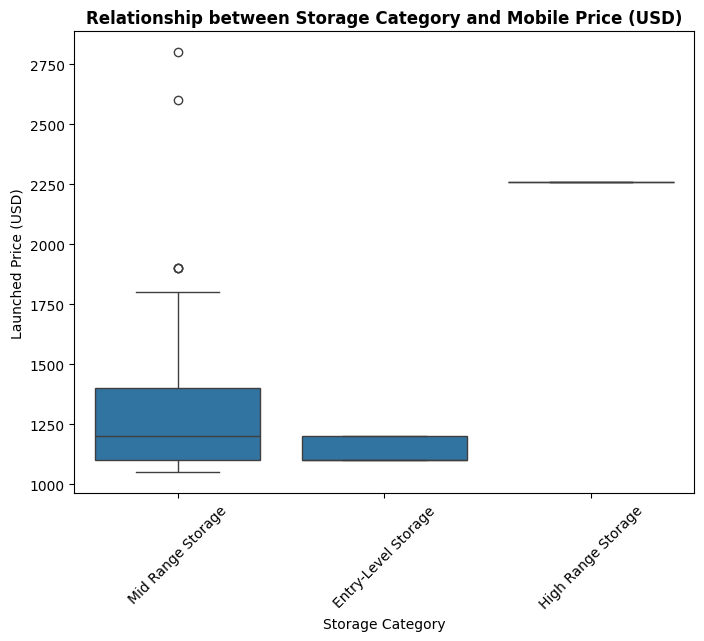

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Launched Price (USD)', data=filtered_df)
plt.title('Relationship between Storage Category and Mobile Price (USD)', fontsize=12, fontweight="bold")
plt.xlabel('Storage Category', fontsize=10)
plt.ylabel('Launched Price (USD)', fontsize=10)
plt.xticks(rotation=45)
plt.show()


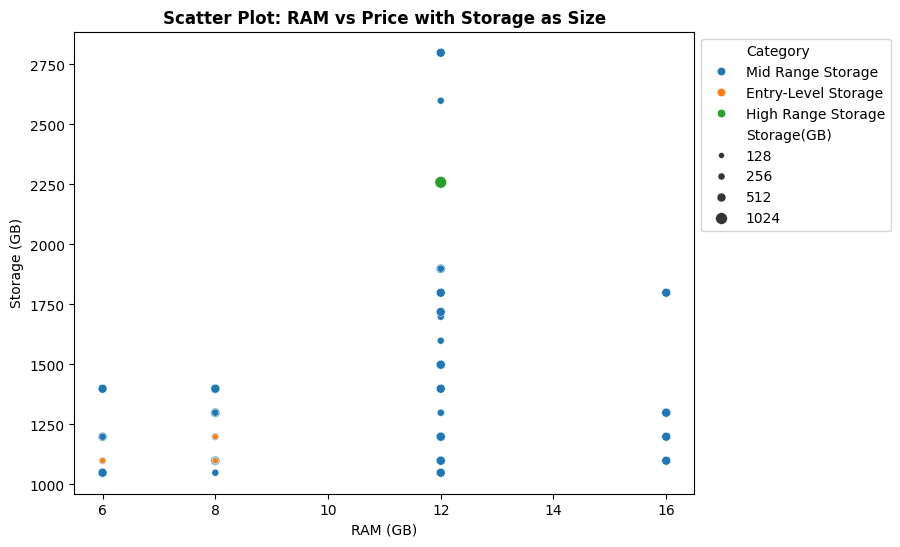

In [41]:
# Scatter plot for a detailed view between RAM and Storage on Launched Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RAM (GB)', y='Launched Price (USD)', size='Storage(GB)', data=filtered_df, hue='Category', legend=True)
plt.title('Scatter Plot: RAM vs Price with Storage as Size', fontsize=12, fontweight="bold")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('RAM (GB)', fontsize=10)
plt.ylabel('Storage (GB)', fontsize=10)
plt.show()

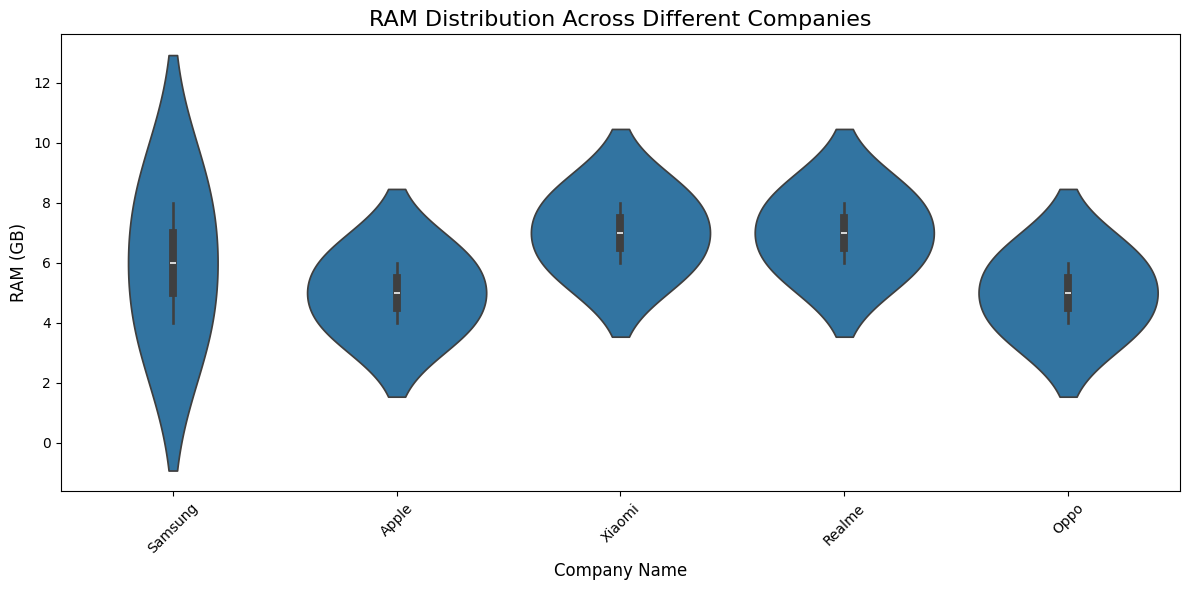

In [58]:
# Plot: Violin plot for RAM distribution across companies without specifying a palette
plt.figure(figsize=(12, 6))
sns.violinplot(x='Company Name', y='RAM', data=df_clean)

plt.title('RAM Distribution Across Different Companies', fontsize=16)
plt.xlabel('Company Name', fontsize=12)
plt.ylabel('RAM (GB)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


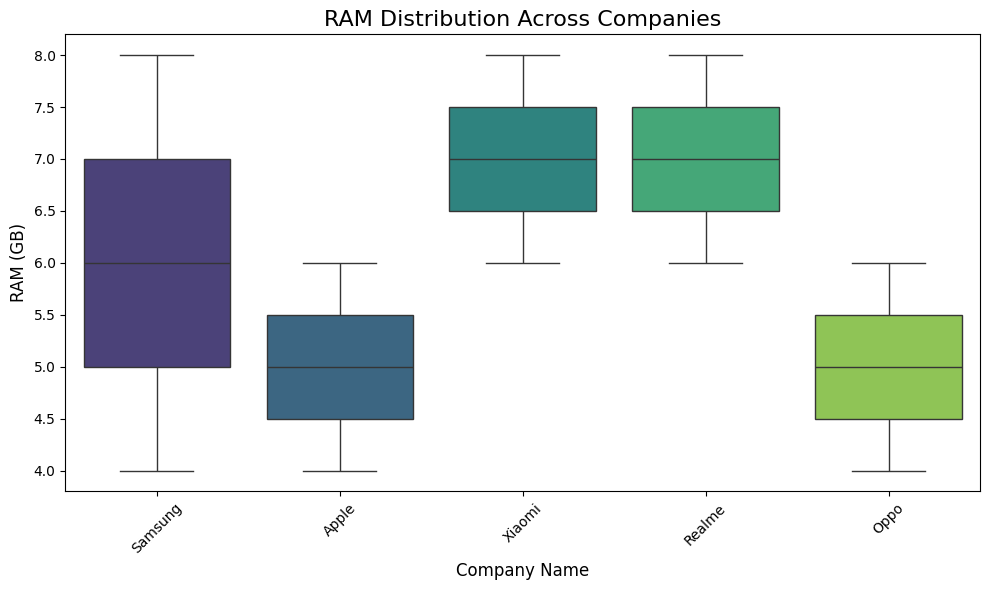

In [57]:
plt.figure(figsize=(10, 6))

# Use the 'hue' argument to avoid future warnings
sns.boxplot(x='Company Name', y='RAM', data=df, hue='Company Name', palette='viridis')

# Title and labels
plt.title('RAM Distribution Across Companies', fontsize=16)
plt.xlabel('Company Name', fontsize=12)
plt.ylabel('RAM (GB)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()
